# Assignment 16
The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
tf.debugging.set_log_device_placement(False)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Generating reproducible results from same code
tf.random.set_seed(14)

In [ ]:
gas=pd.read_csv("gas_turbines.csv")
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
# Checking for null values
gas.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
# Checking for duplicate values
gas.duplicated().sum()

0

In [ ]:
df=gas[['AT','AP','AH','TEY']]
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [ ]:
df.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


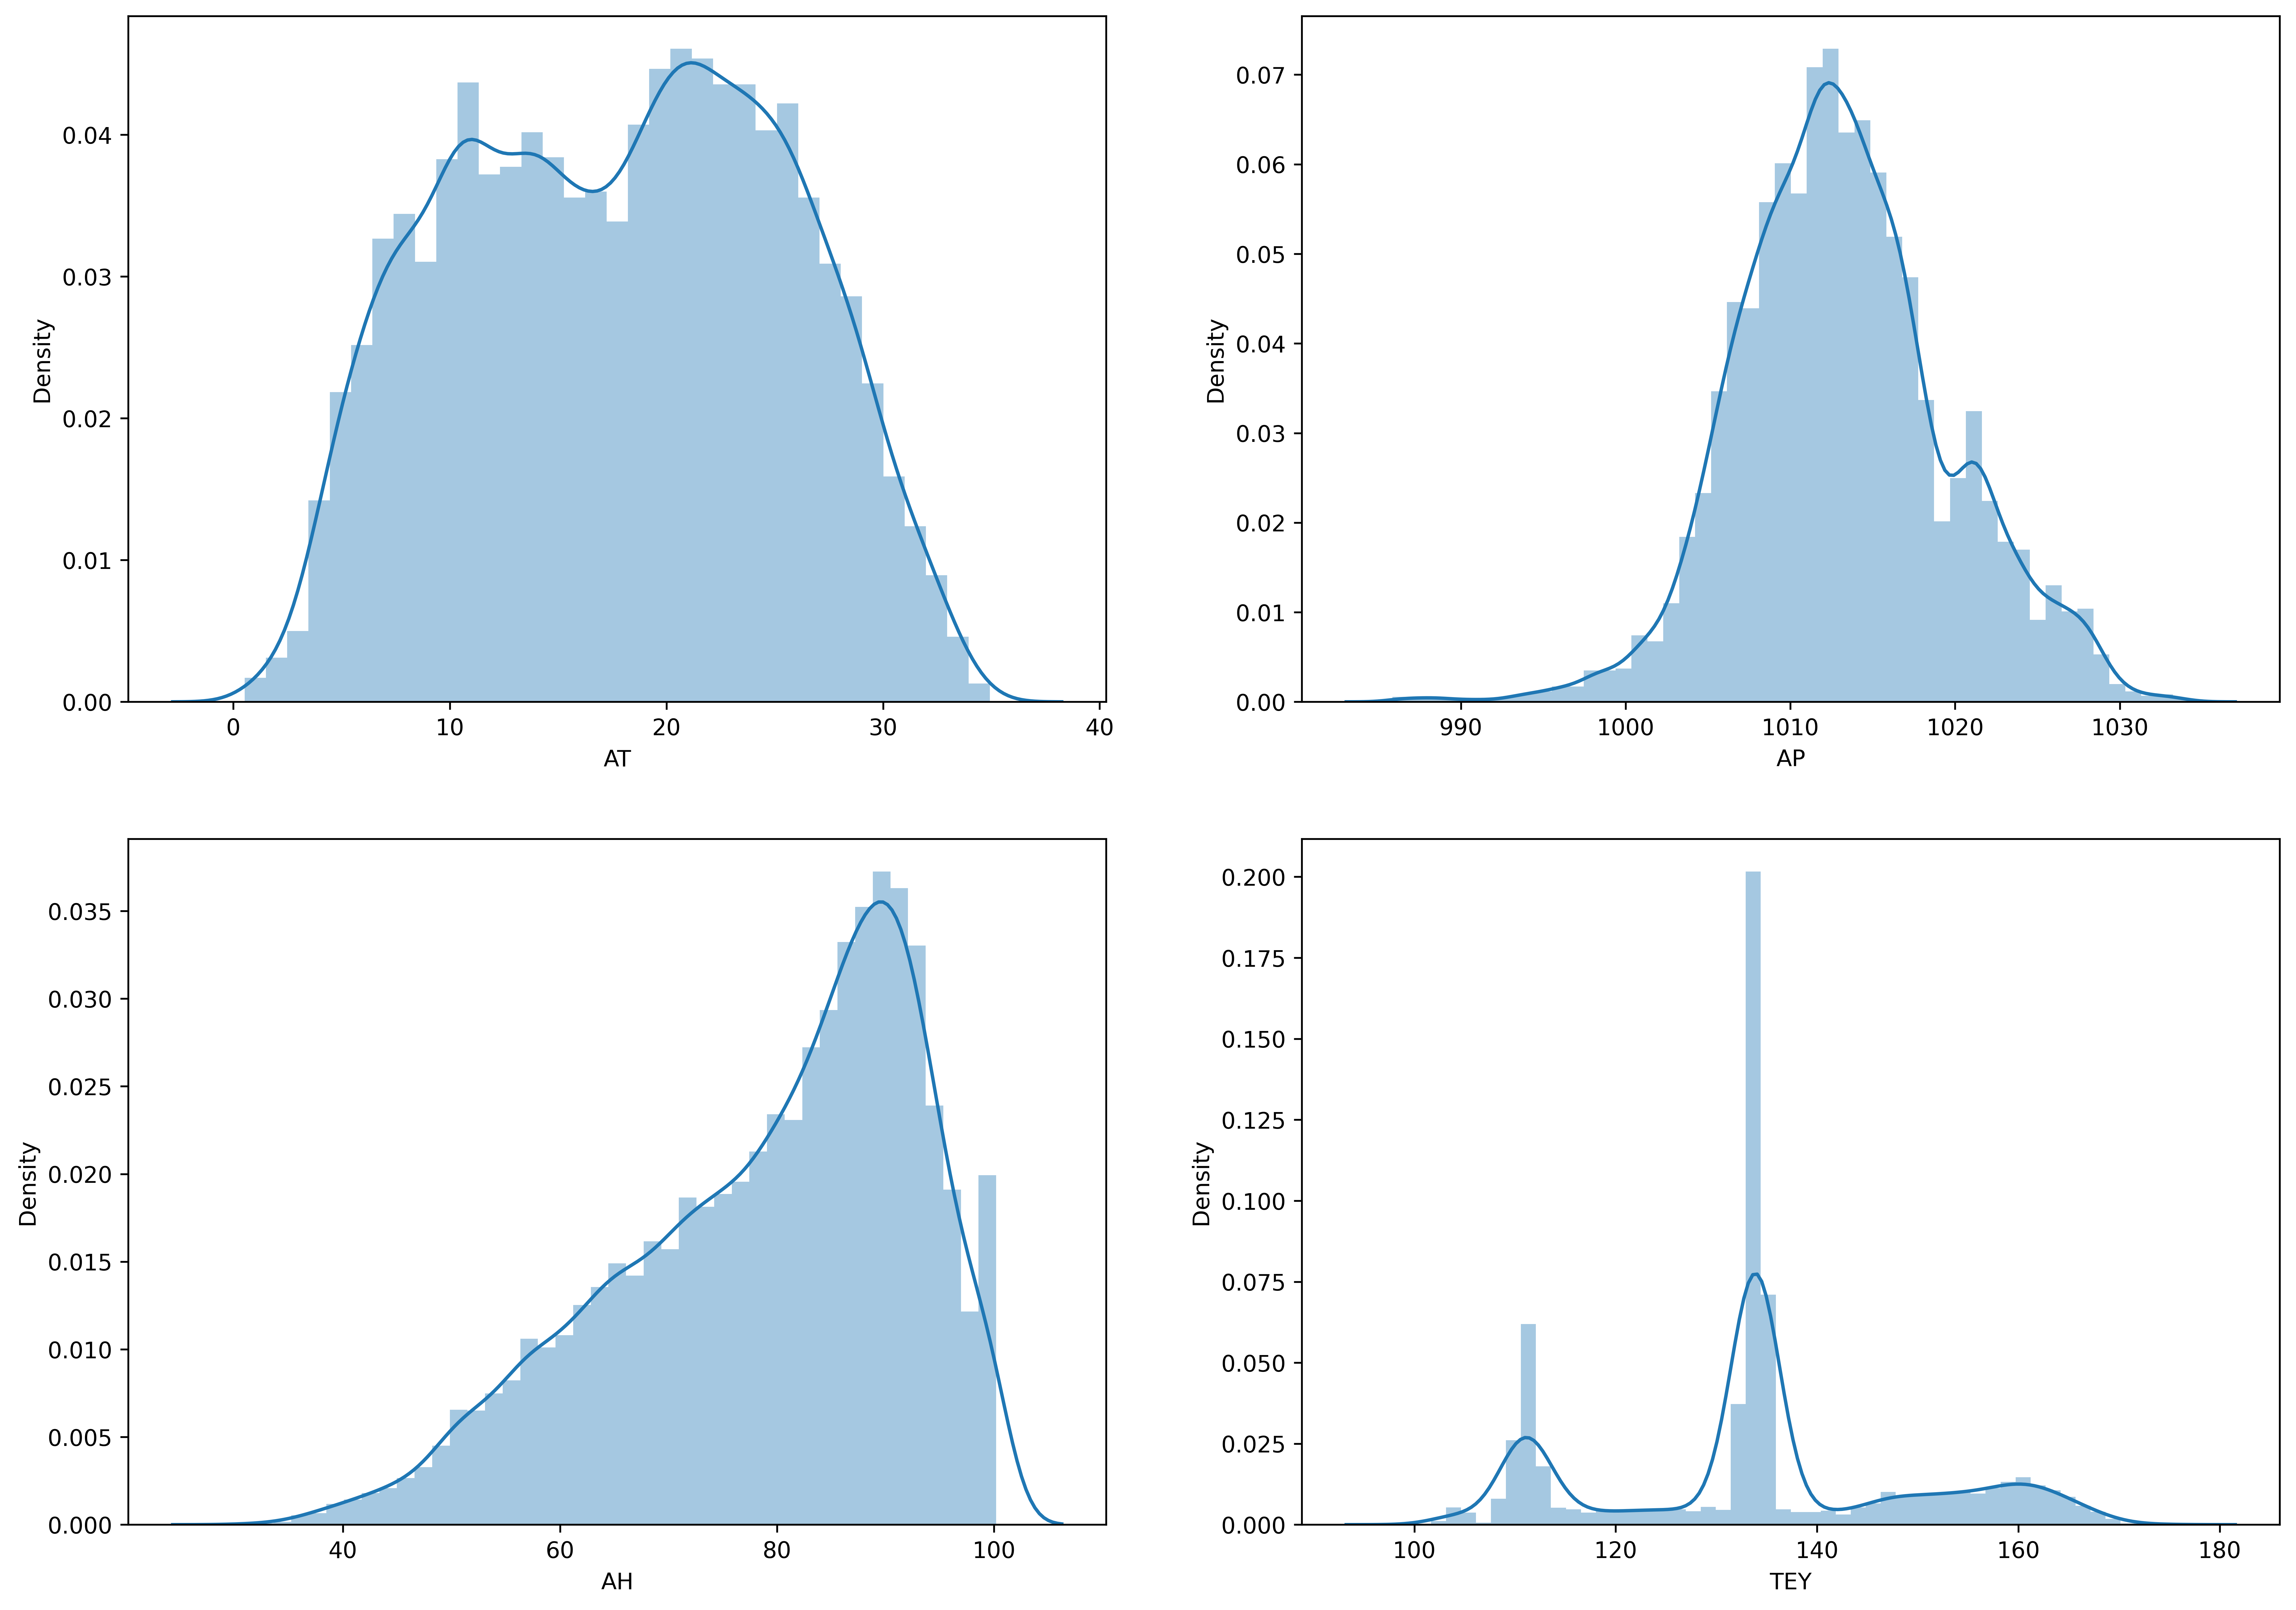

In [ ]:
# distplot

fig, ax = plt.subplots(2,2, figsize = (17,12),dpi=600)

sns.distplot(df.AT, ax = ax[0,0])
sns.distplot(df.AP, ax = ax[0,1])
sns.distplot(df.AH, ax = ax[1,0])
sns.distplot(df.TEY, ax = ax[1,1])
plt.show()

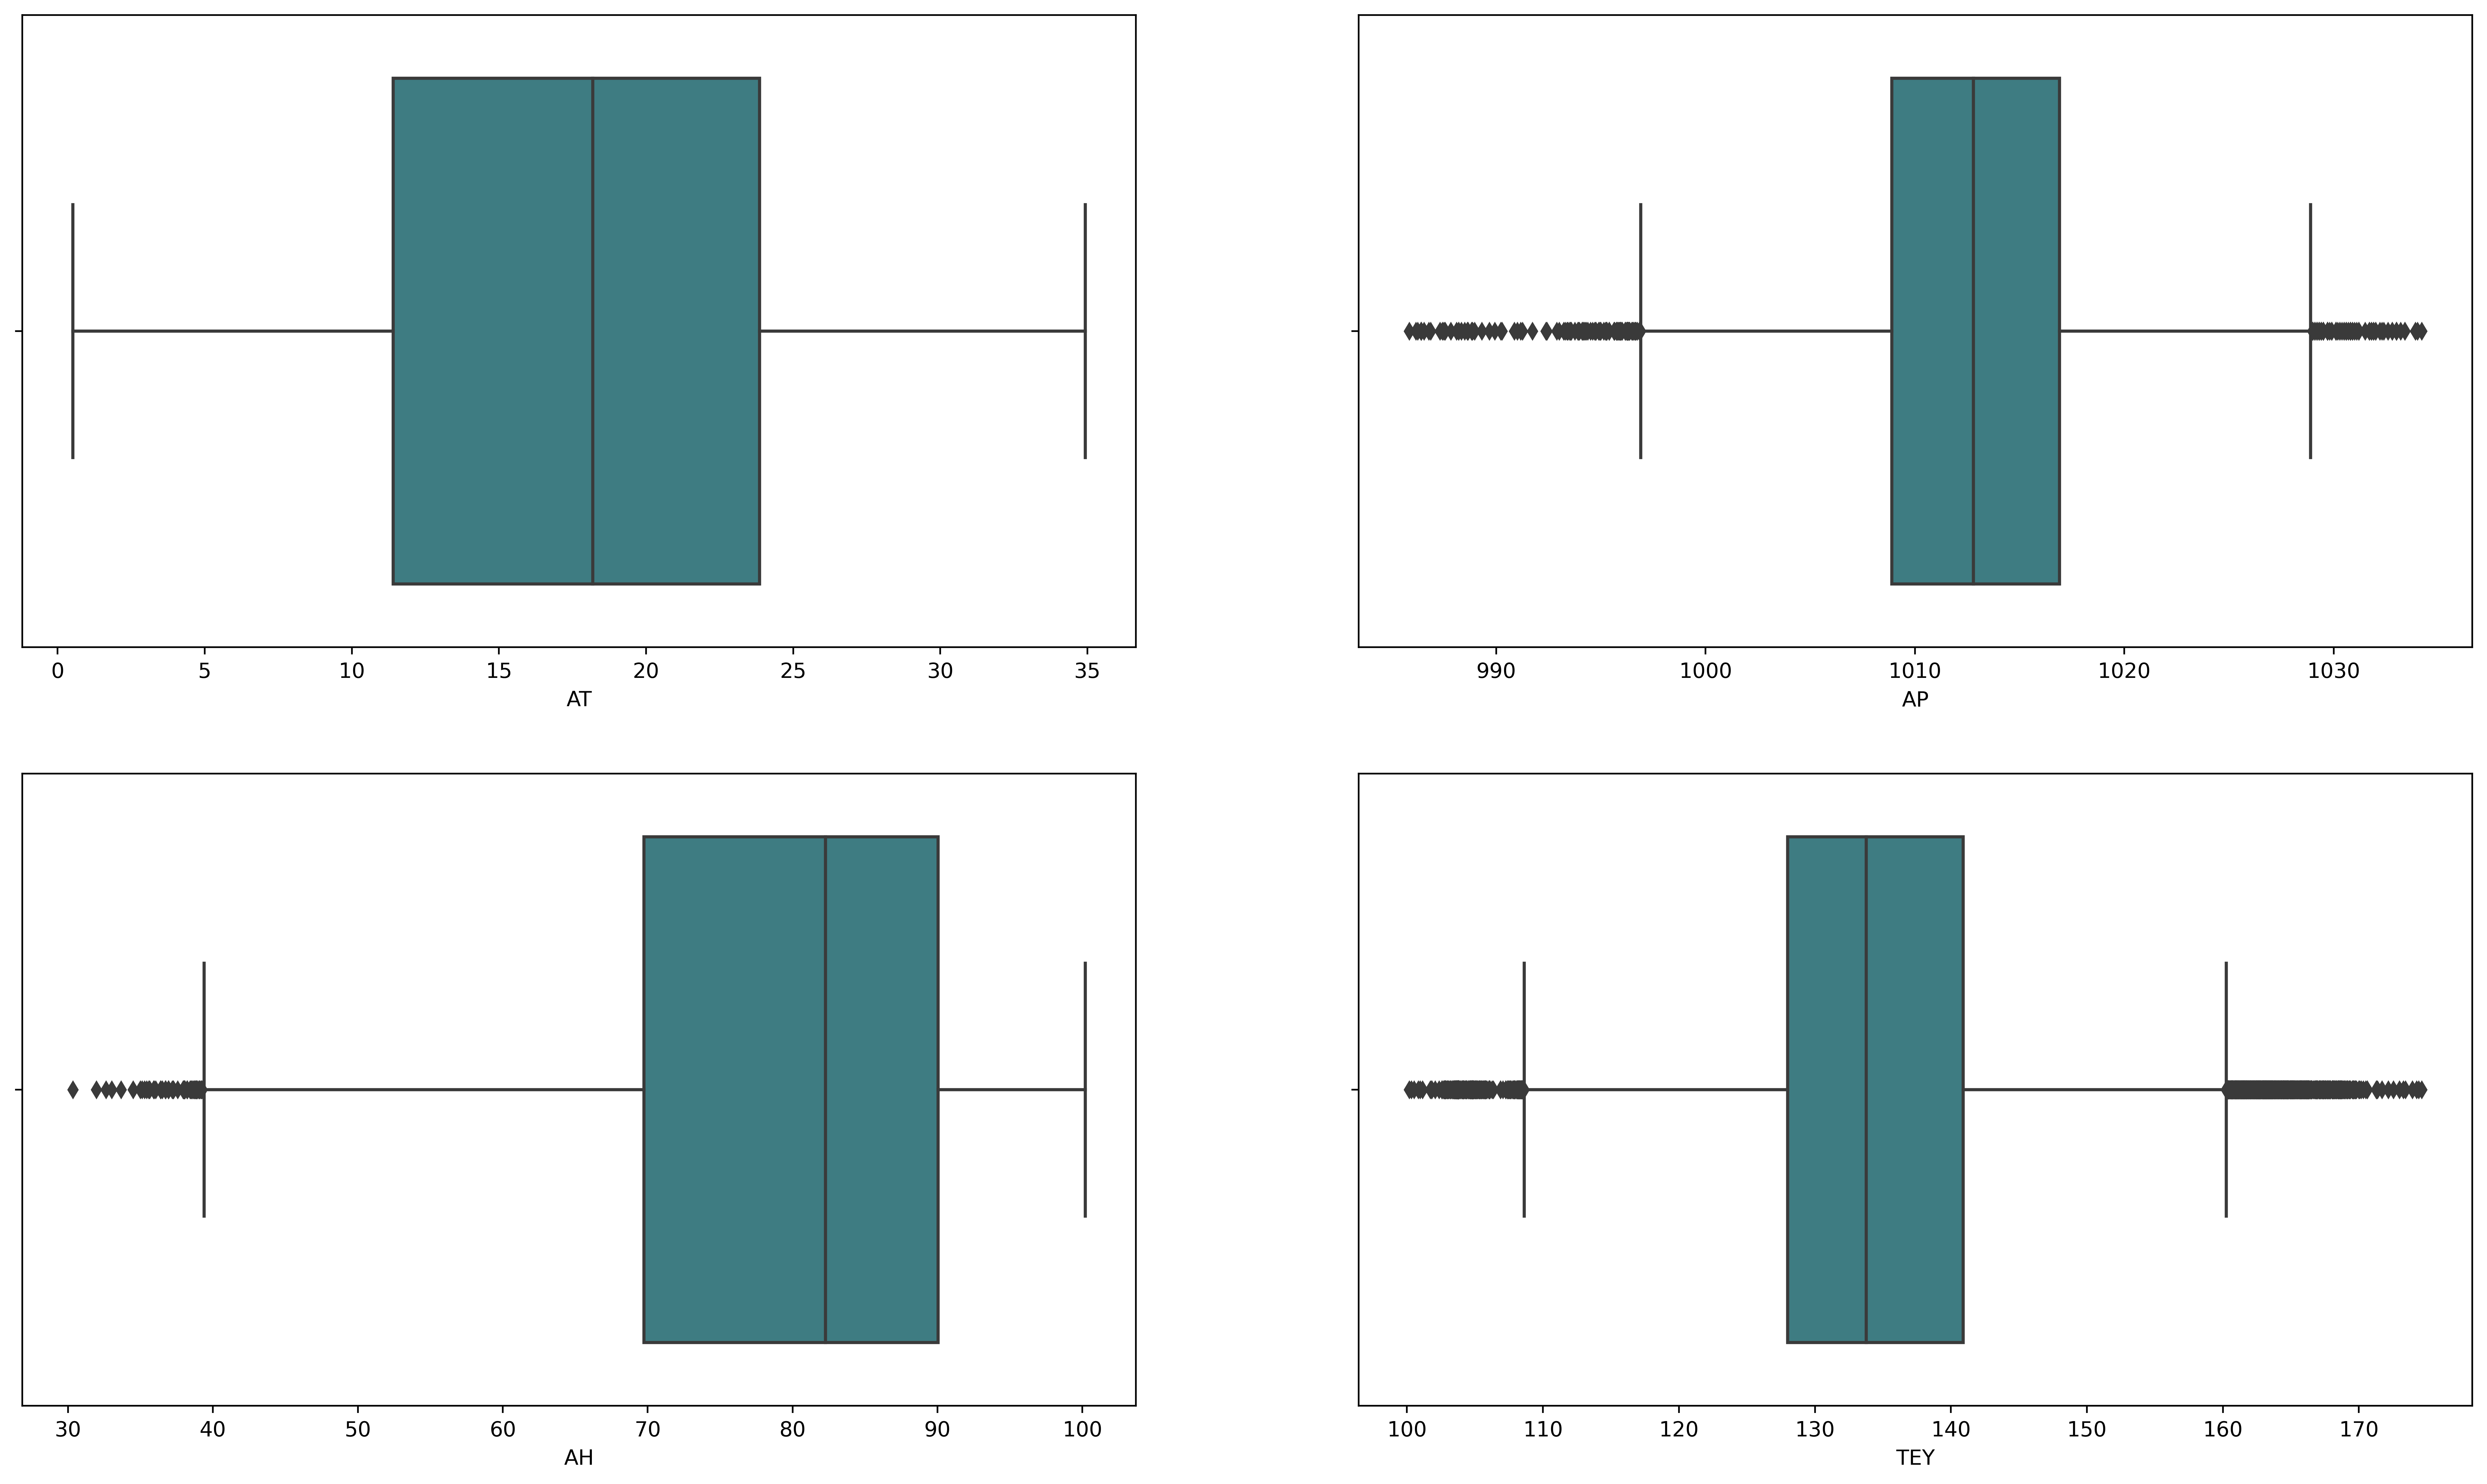

In [ ]:
# Outlier detection
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(21, 12),dpi=500)
sns.boxplot(x='AT',data=df,palette='crest',ax=axes[0,0])
sns.boxplot(x='AP',data=df,palette='crest',ax=axes[0,1])
sns.boxplot(x='AH',data=df,palette='crest',ax=axes[1,0])
sns.boxplot(x='TEY',data=df,palette='crest',ax=axes[1,1])
plt.show()

Text(0.5, 1.0, 'Histogram of the Target Column')

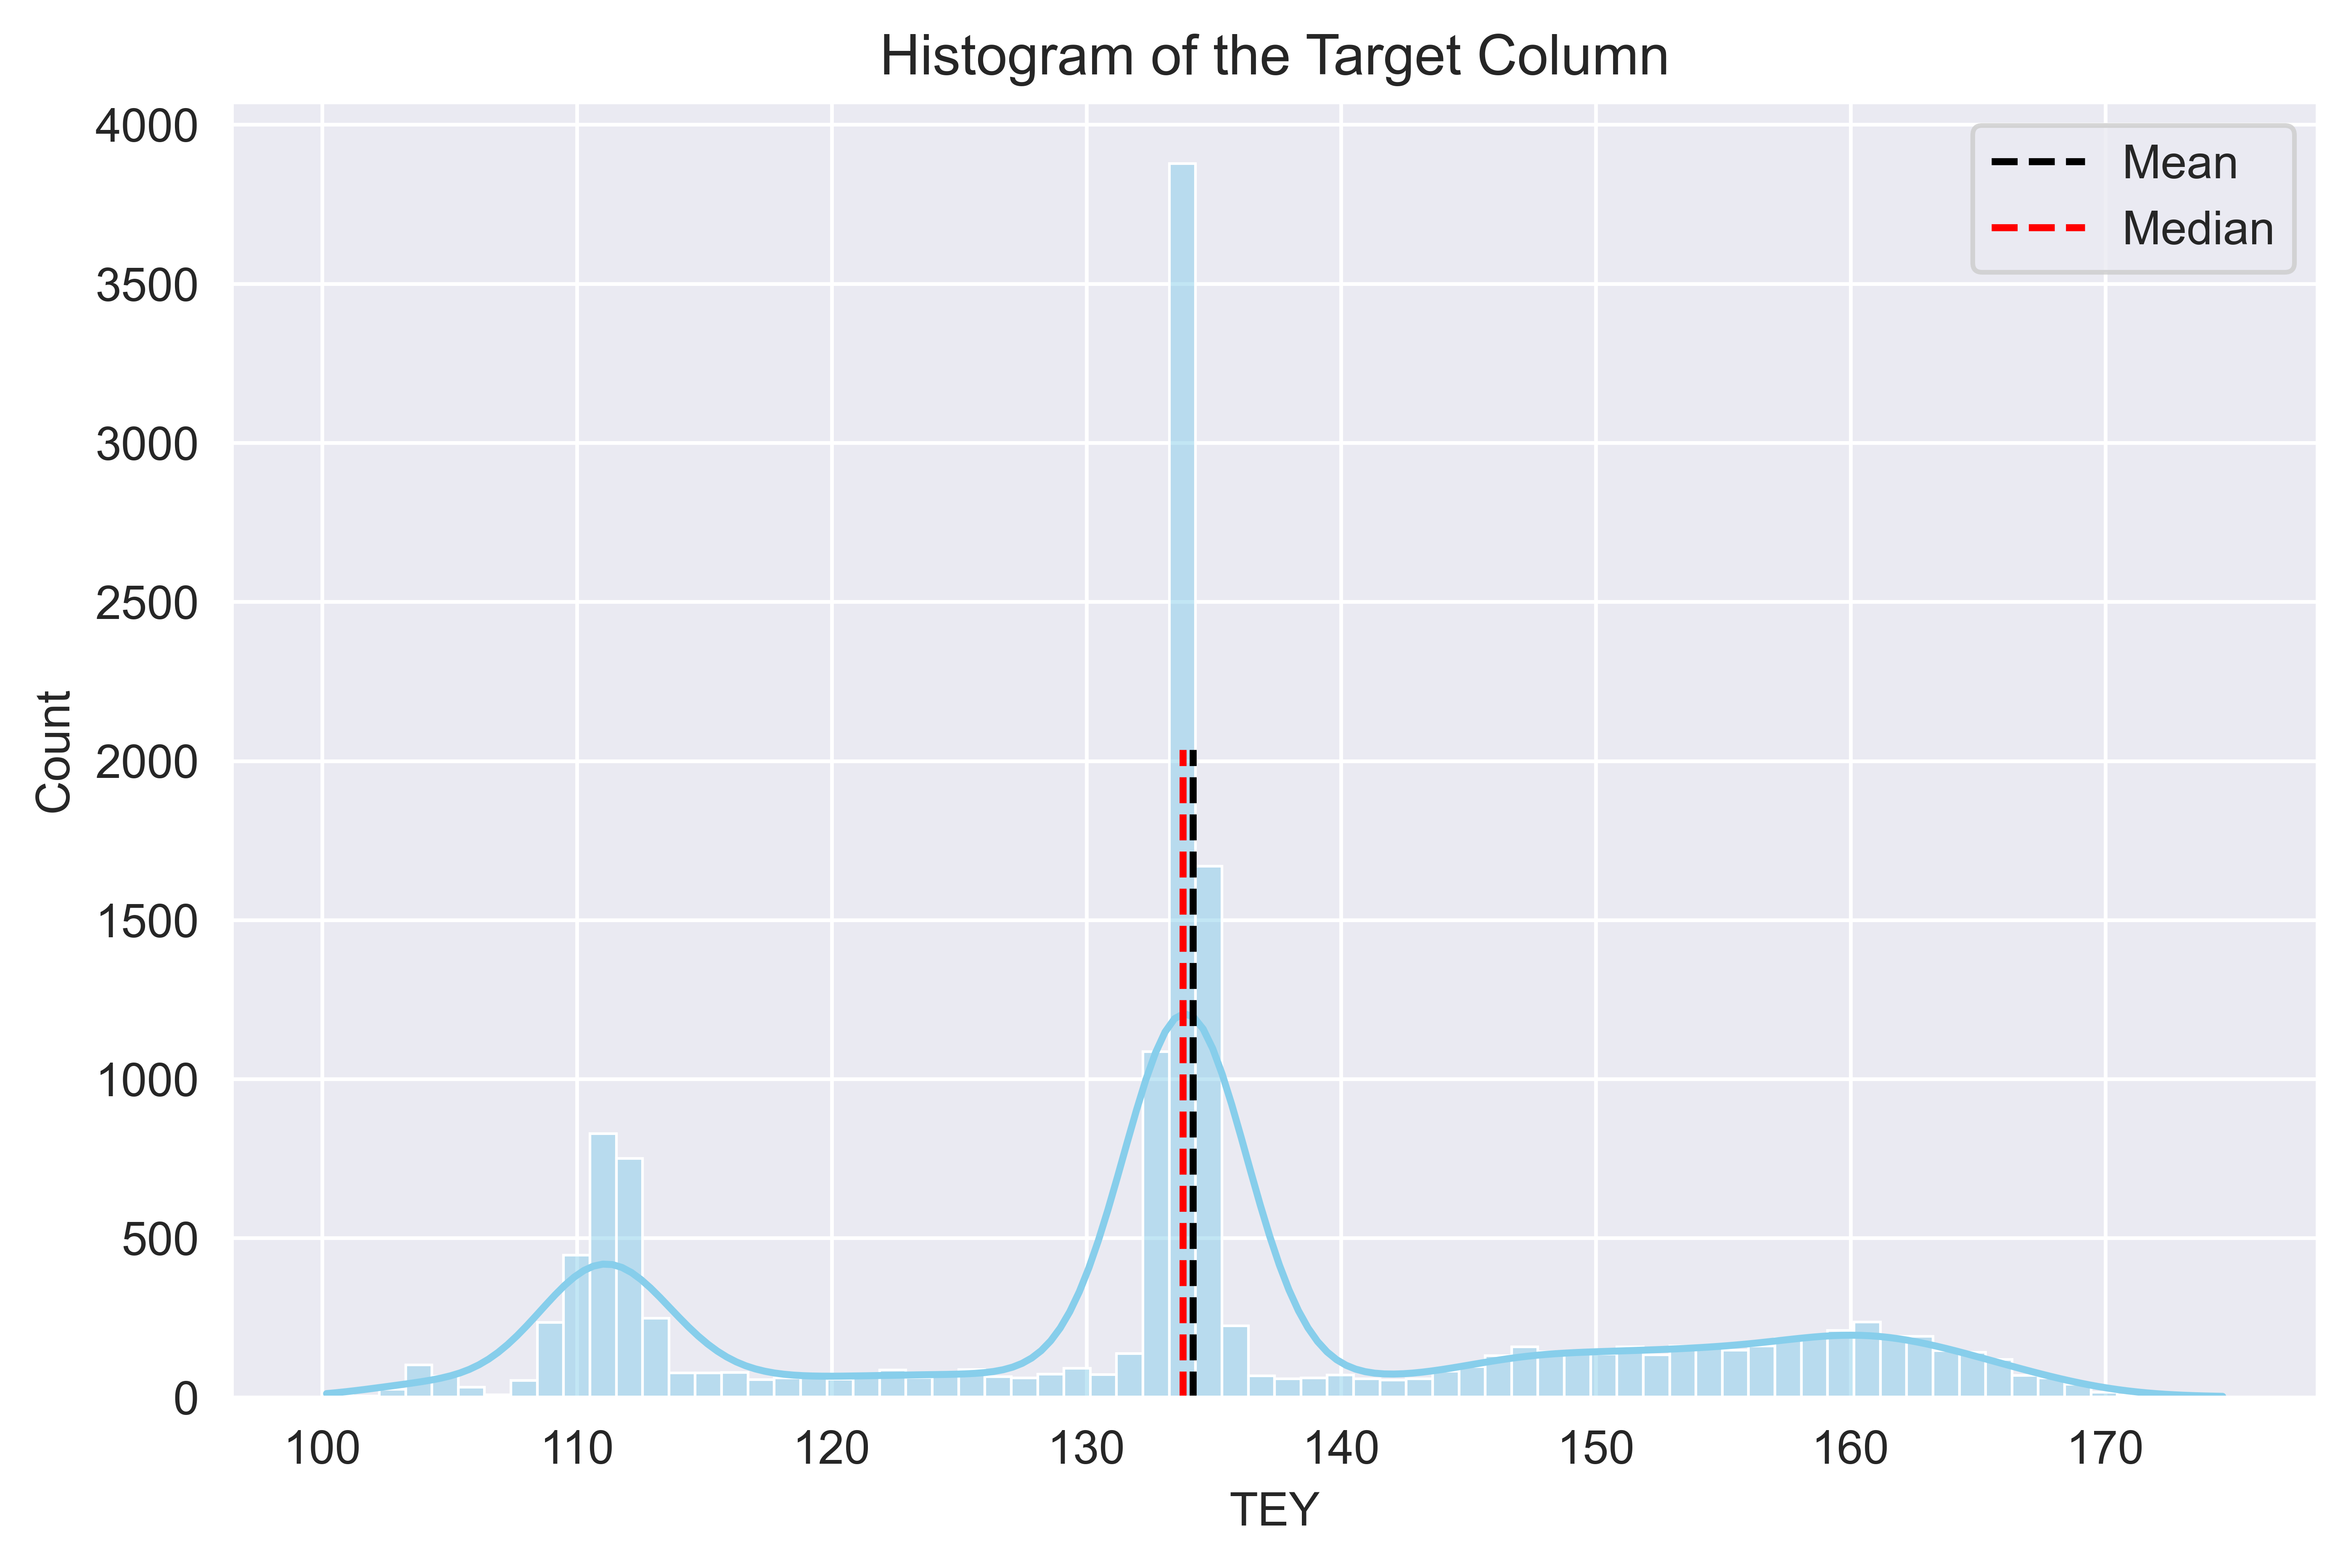

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,5),dpi=800)
sns.histplot(data=df,x="TEY",color="skyblue",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.5,color="black",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.5,color="red",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

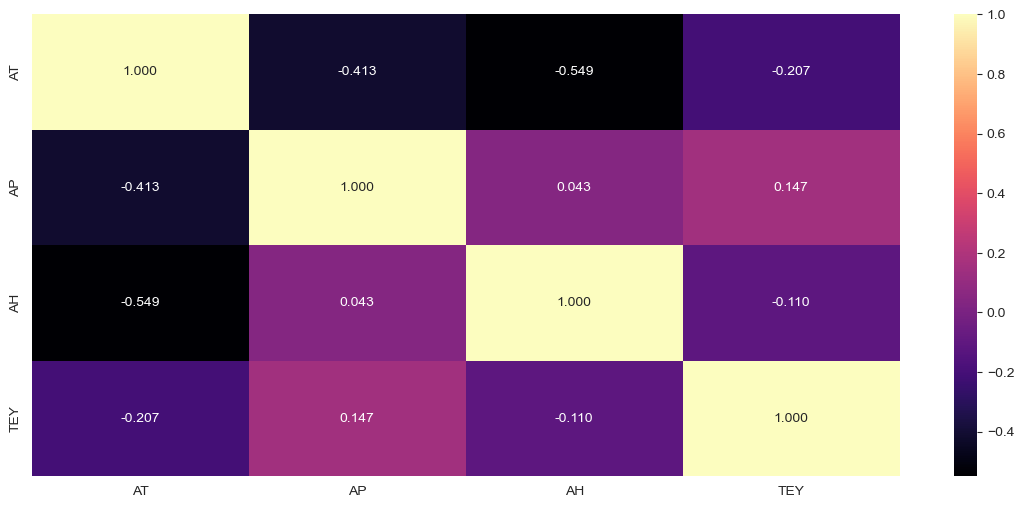

In [ ]:
# Heatmap
plt.figure(figsize = (14, 6));
sns.heatmap(df.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

# Feature Analysis
All features in the dataset can be used in model building. This is a Regression Problem

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [ ]:
# Splitting the data into train and test
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [ ]:
y_train=np.reshape(y_train.to_numpy(), (-1,1))
y_test=np.reshape(y_test.to_numpy(), (-1,1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_test)
xtest_scale=scaler_x.transform(X_test)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_test)
ytest_scale=scaler_y.transform(y_test)

In [ ]:
len(xtrain_scale)

10527

In [ ]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(X, Y)

In [ ]:
scores = fit.scores_
features = fit.transform(X)

In [ ]:
score_df = pd.DataFrame(list(zip(scores, X.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
0,0.412307,AT
1,0.136867,AP
2,0.097743,AH


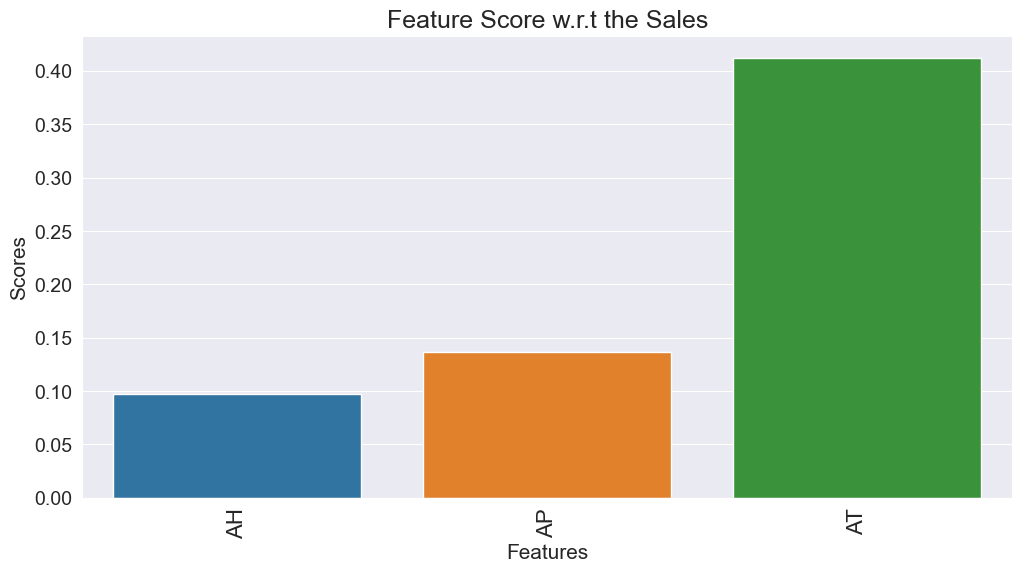

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [ ]:
score_df.sort_values('Score', ascending=False)

,Score,Feature
0,0.412307,AT
1,0.136867,AP
2,0.097743,AH


### Neural network modelling

In [ ]:
# create model
model = Sequential()
model.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

# Fit the model
hist = model.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)

Epoch 1/100
48/48 [==============================] - 1s 10ms/step - loss: 0.0691 - mse: 0.0691 - mae: 0.1998 - val_loss: 0.0465 - val_mse: 0.0465 - val_mae: 0.1597
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0456 - mse: 0.0456 - mae: 0.1522 - val_loss: 0.0456 - val_mse: 0.0456 - val_mae: 0.1527
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0449 - mse: 0.0449 - mae: 0.1508 - val_loss: 0.0448 - val_mse: 0.0448 - val_mae: 0.1564
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0445 - mse: 0.0445 - mae: 0.1558 - val_loss: 0.0435 - val_mse: 0.0435 - val_mae: 0.1531
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0434 - mse: 0.0434 - mae: 0.1563 - val_loss: 0.0425 - val_mse: 0.0425 - val_mae: 0.1554
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0425 - mse: 0.0425 - mae: 0.1558 - val_loss: 0.0419 - val_mse: 0.0419 - val_mae: 0.1571
Epoch 7/100
48/48 [==

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 2106)              10530     
                                                                 
 dense_2 (Dense)             (None, 1)                 2107      
                                                                 
Total params: 12,653
Trainable params: 12,653
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define the first model architecture
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

# Compile the first model
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the first model to the training data
model1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
658/658 [==============================] - 2s 2ms/step - loss: 430.6014 - mae: 13.7776 - val_loss: 248.2768 - val_mae: 11.7828
Epoch 2/50
658/658 [==============================] - 1s 2ms/step - loss: 246.5662 - mae: 11.9042 - val_loss: 242.7727 - val_mae: 11.8542
Epoch 3/50
658/658 [==============================] - 1s 2ms/step - loss: 239.2868 - mae: 11.9438 - val_loss: 236.2693 - val_mae: 11.8547
Epoch 4/50
658/658 [==============================] - 1s 2ms/step - loss: 241.0681 - mae: 12.2155 - val_loss: 230.9077 - val_mae: 11.8368
Epoch 5/50
658/658 [==============================] - 1s 2ms/step - loss: 237.9988 - mae: 12.2407 - val_loss: 239.3265 - val_mae: 12.4059
Epoch 6/50
658/658 [==============================] - 1s 2ms/step - loss: 232.5753 - mae: 12.1420 - val_loss: 238.4092 - val_mae: 12.2494
Epoch 7/50
658/658 [==============================] - 1s 2ms/step - loss: 235.9946 - mae: 12.2656 - val_loss: 247.7883 - val_mae: 12.5751
Epoch 8/50
658/658 [==============

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                128       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Define the second model architecture
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')])

# Compile the second model
model2.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mse'])

# Fit the second model to the training data
model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
329/329 [==============================] - 2s 2ms/step - loss: 14.8290 - mse: 539.4153 - val_loss: 12.6431 - val_mse: 265.1754
Epoch 2/100
329/329 [==============================] - 1s 2ms/step - loss: 11.7151 - mse: 253.0450 - val_loss: 11.4022 - val_mse: 250.1666
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 11.9479 - mse: 254.7073 - val_loss: 11.3687 - val_mse: 247.7890
Epoch 4/100
329/329 [==============================] - 1s 2ms/step - loss: 11.6377 - mse: 247.4578 - val_loss: 12.5927 - val_mse: 260.6750
Epoch 5/100
329/329 [==============================] - 1s 2ms/step - loss: 11.5707 - mse: 244.8319 - val_loss: 11.3492 - val_mse: 244.2765
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 11.4830 - mse: 242.9349 - val_loss: 11.8349 - val_mse: 247.6522
Epoch 7/100
329/329 [==============================] - 1s 2ms/step - loss: 11.5530 - mse: 243.7165 - val_loss: 11.5559 - val_mse: 244.3462
Epoch 8/100
329/329 [======

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


### Model Evaluation

In [ ]:
y_predict = model.predict(xtest_scale)

141/141 [==============================] - 0s 1ms/step


In [ ]:
y_pred1 = model1.predict(xtest_scale)

141/141 [==============================] - 0s 1ms/step


In [ ]:
y_pred2 = model2.predict(xtest_scale)

141/141 [==============================] - 0s 2ms/step


In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [ ]:
hist_df = pd.DataFrame(hist.history)
hist_df["epoch"]=hist.epoch
hist_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.038360,0.038360,0.154146,0.038102,0.038102,0.155081,95
96,0.038310,0.038310,0.154468,0.038061,0.038061,0.154405,96
97,0.038721,0.038721,0.155812,0.038024,0.038024,0.154163,97
98,0.038276,0.038276,0.154322,0.037982,0.037982,0.154080,98
99,0.038358,0.038358,0.154028,0.038209,0.038209,0.154932,99


### Visualising

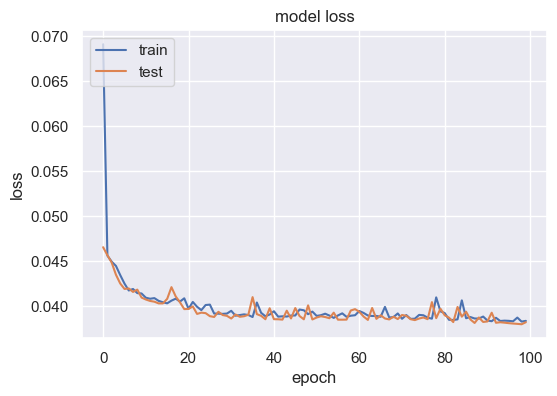

In [ ]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

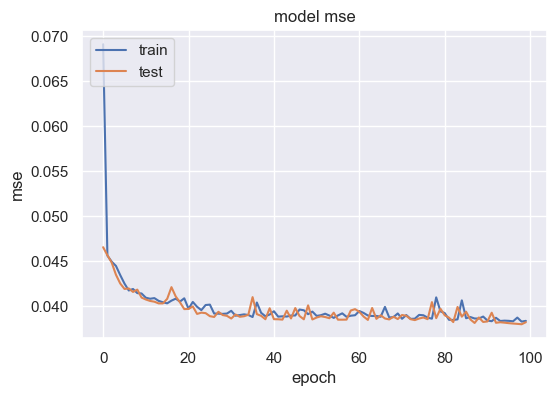

In [ ]:
# summarize history for loss

plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()